# Import 



In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from datetime import datetime


# Download stock data



In [20]:
stock = 'NVDA'
df = yf.download(stock, start='2020-01-01', end=datetime.today().strftime('%Y-%m-%d'))

df.head()

C:\Users\pawel\AppData\Local\Temp\ipykernel_80244\2191437935.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start='2020-01-01', end=datetime.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.971076,5.971076,5.891682,5.942206,237536000
2020-01-03,5.875504,5.919309,5.826473,5.851362,205384000
2020-01-06,5.900144,5.905371,5.756038,5.782171,262636000
2020-01-07,5.971575,6.017371,5.883469,5.928518,314856000
2020-01-08,5.982775,6.024090,5.927273,5.967344,277108000


In [46]:
df['RSI'] = talib.RSI(df['Close'].values.ravel(), timeperiod=14)

# EDA SECTION

In [32]:

df['Year'] = df.index.year
years = df['Year'].unique()
for year in sorted(years):
    yearly_df = df[df['Year'] == year]
    print(yearly_df.describe())
    

Price        Close        High         Low        Open        Volume    Year
Ticker        NVDA        NVDA        NVDA        NVDA          NVDA        
count   253.000000  253.000000  253.000000  253.000000  2.530000e+02   253.0
mean      9.856863   10.029308    9.664666    9.854148  4.808553e+08  2020.0
std       2.926288    2.960222    2.903750    2.952333  2.301756e+08     0.0
min       4.891088    5.228285    4.499603    4.983233  9.788400e+07  2020.0
25%       6.805935    7.052731    6.681404    6.895837  3.103360e+08  2020.0
50%       9.579596    9.704420    9.545711    9.606254  4.102280e+08  2020.0
75%      12.950743   13.121214   12.787039   12.992116  6.226240e+08  2020.0
max      14.516874   14.681116   13.975309   14.658186  1.463684e+09  2020.0
Price        Close        High         Low        Open        Volume    Year
Ticker        NVDA        NVDA        NVDA        NVDA          NVDA        
count   252.000000  252.000000  252.000000  252.000000  2.520000e+02   252.0

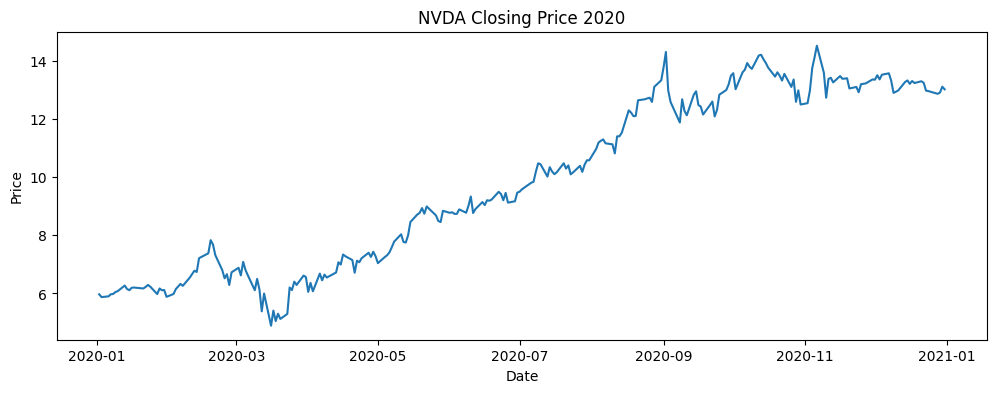

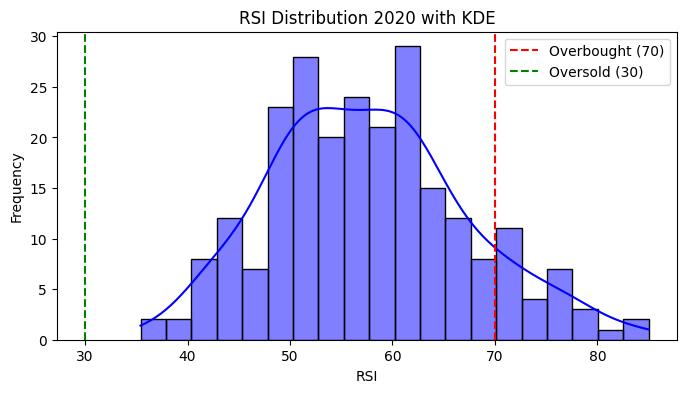

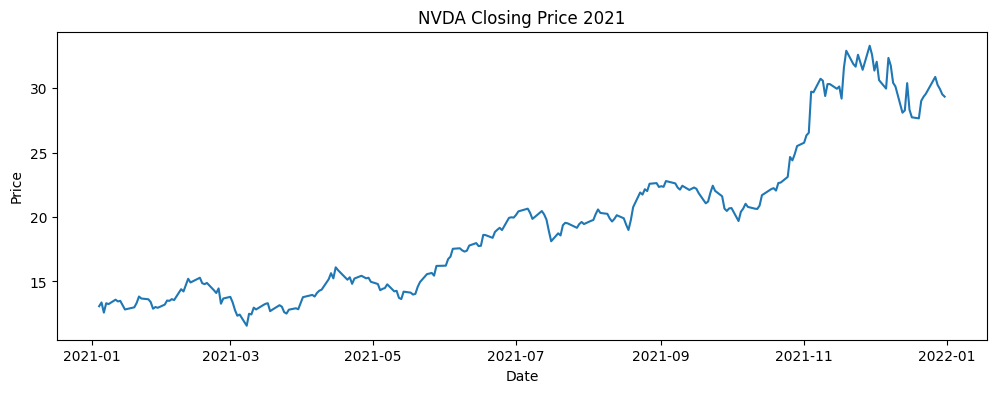

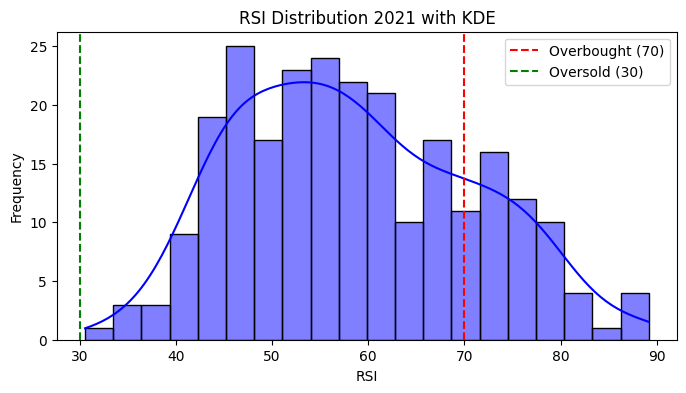

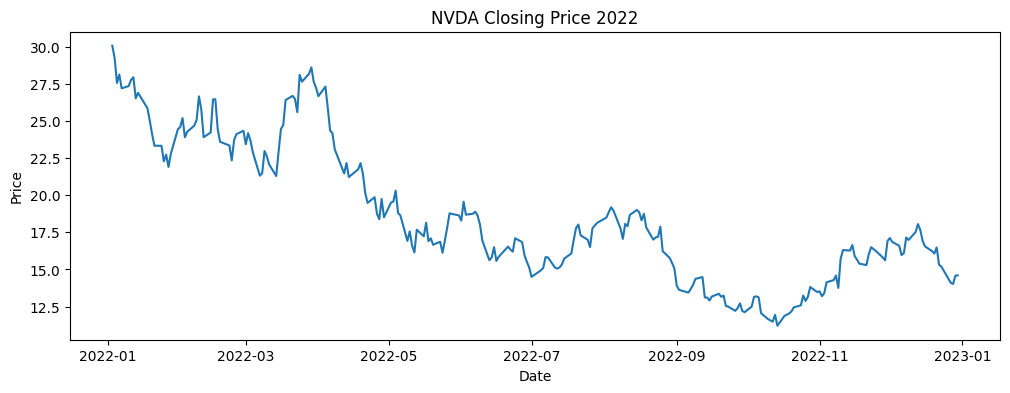

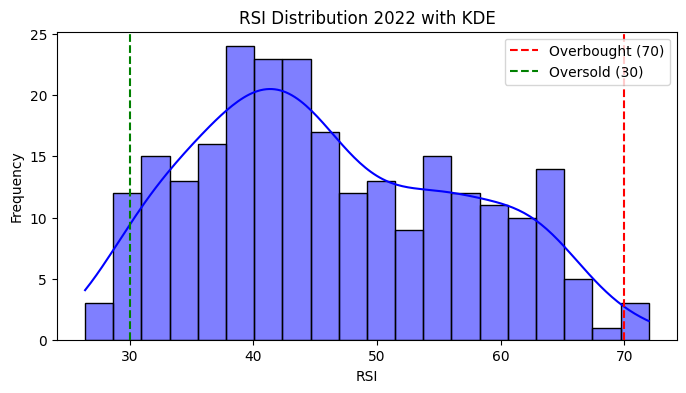

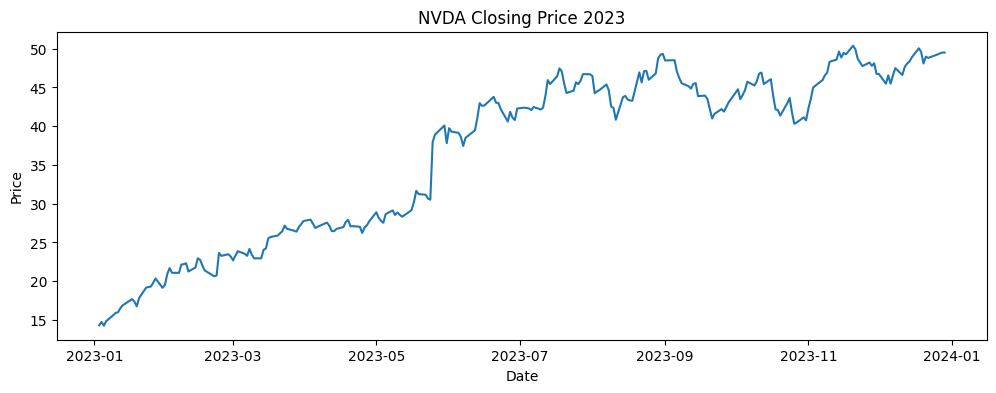

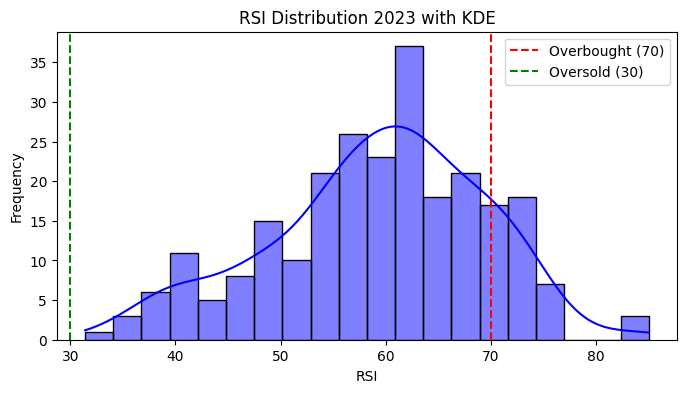

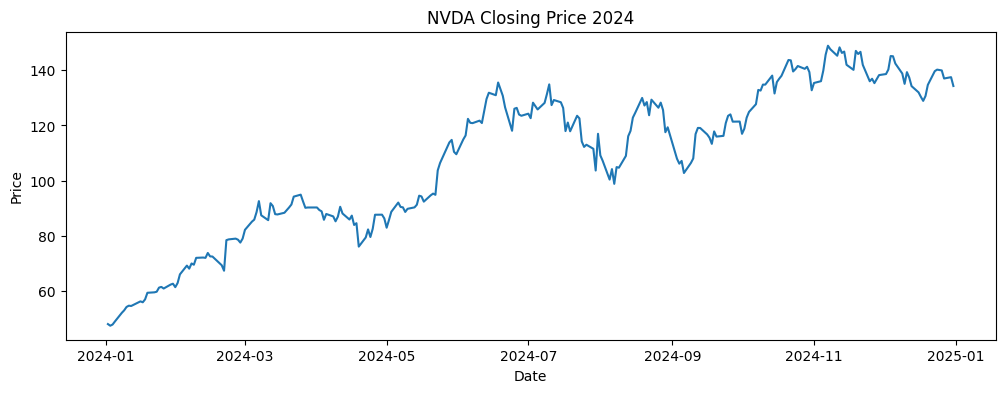

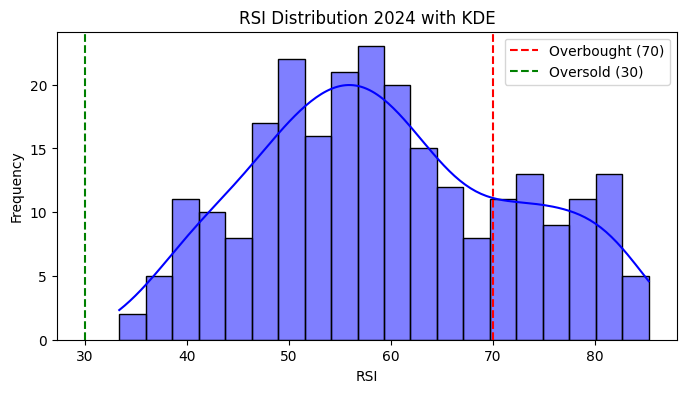

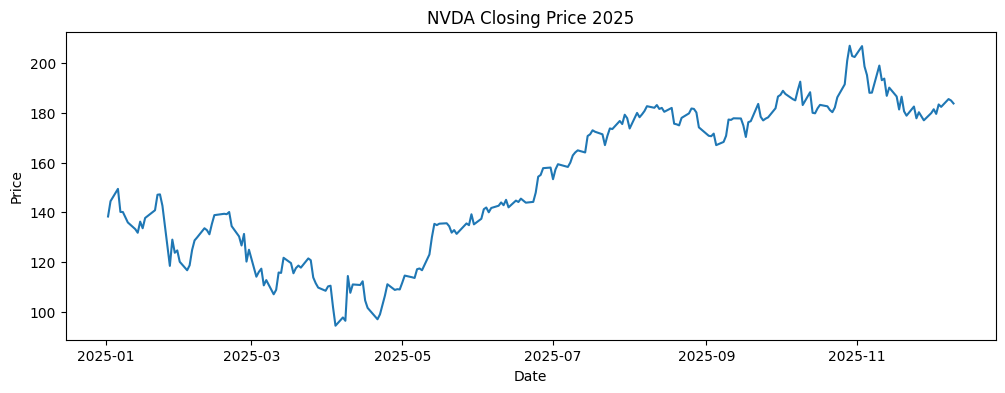

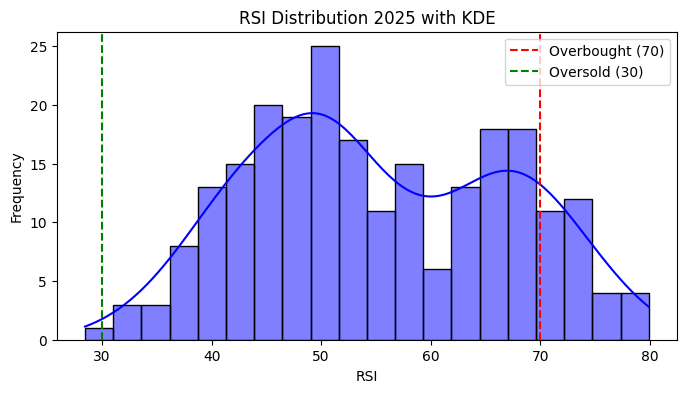

In [56]:
for year in sorted(years):
    yearly_df = df[df['Year'] == year]

    #Closing chart
    plt.figure(figsize=(12,4))
    plt.plot(yearly_df['Close'])
    plt.title(f'NVDA Closing Price {year}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

    #Histogram RSI
    plt.figure(figsize=(8,4))
    sns.histplot(yearly_df['RSI'].dropna(), bins=20, color='blue', kde=True)
    plt.axvline(70, color='red', linestyle='--', label = 'Overbought (70)' )
    plt.axvline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'RSI Distribution {year} with KDE')
    plt.xlabel('RSI')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    